# Tidal Report

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [3]:
day = np.genfromtxt("ASTR19_S22_group_project_data.txt", dtype = "float", skip_header = 3, usecols = 0)
time_day = np.genfromtxt("ASTR19_S22_group_project_data.txt", dtype = "str", skip_header = 3, usecols = 1)
tide_height = np.genfromtxt("ASTR19_S22_group_project_data.txt", dtype = "float", skip_header = 3, usecols = 2)
for i in range(len(time_day)):
    split_time = time_day[i].split(":")
    time = (int(split_time[0]) + (int(split_time[1]) / 60)) / 24
    time_day[i] = time
    day[i] = day[i] + time

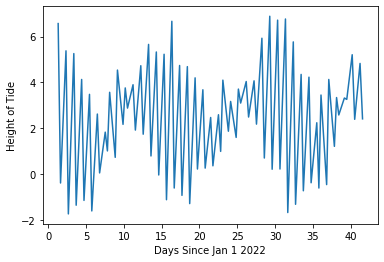

In [4]:
plt.plot(day, tide_height)
plt.xlabel("Days Since Jan 1 2022")
plt.ylabel("Height of Tide")
plt.savefig("tidal_report_figure.pdf")

In [5]:
def f_line(x, freq1, freq2, freq3, a2, a3, w1, w2, w3, off, off2):
    return np.sin(freq1 * x + w1) *(a2 * np.sin(freq2 * x + w2) + a3 * np.sin(freq3 * x + w3) + off) + off2

lower = [0.5, 10, 20, 0, 0, 0, -np.inf, -np.inf, -np.inf, -np.inf]
upper = [1.5, 20, 40, 10, 10, 10, np.inf, np.inf, np.inf, np.inf]
tide_height_err = np.full(tide_height.shape, 0.25)
ps, ps_cov = optimize.curve_fit(f_line, day, tide_height, bounds = (lower, upper), sigma = tide_height_err)
f1, f2, f3, a2, a3, w1, w2, w3, c, c2 = ps

y_fit = f_line(day, f1, f2, f3, a2, a3, w1, w2, w3, c, c2)
print("epic")

epic


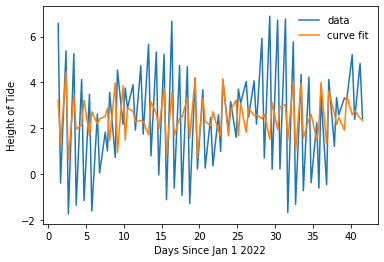

In [6]:
plt.plot(day, tide_height, label = "data")
plt.plot(day, y_fit, label = "curve fit")
plt.xlabel("Days Since Jan 1 2022")
plt.ylabel("Height of Tide")
plt.legend(loc = 0, frameon = False)
plt.savefig("tidal_report_figure_with_curve_fit.pdf")

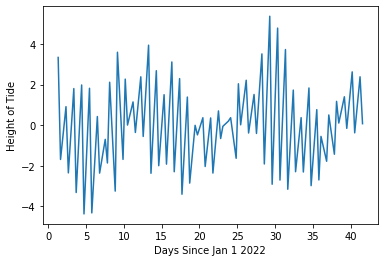

In [15]:
plt.plot(day, tide_height - y_fit)
plt.xlabel("Days Since Jan 1 2022")
plt.ylabel("Height of Tide")
plt.savefig("tidal_report_residuals.pdf")

In [8]:
# standard deviation
print(np.std(tide_height - y_fit))

#intrinsic scatter
print(np.sqrt(np.std(tide_height - y_fit)**2-0.25**2))

2.214643673592233
2.200487809778118


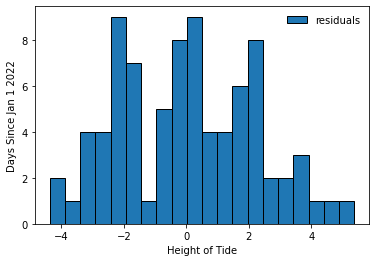

In [9]:
plt.hist(tide_height - y_fit, bins = 20, edgecolor = "black", label = "residuals")
plt.xlabel("Height of Tide")
plt.ylabel("Frequency")
plt.legend(loc = 0, frameon = False)
plt.savefig("tidal_report_histogram.pdf")